In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### fetching the data

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url,header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])


# Iris Data
1. it has 150 rows
2. There are three duplicates data
 - i drop the duplicates value and rows goes to 147
3. there is no null values in the data i.e no need to use any imputation
4. there is outliers in the
 sepal_width
4. this is the supervised learning as it contains the labeled input and the determined output for the labeled data
5. it is the multiclass classification problem as the target variable contains ['Iris-setosa'=50, 'Iris-versicolor'=49, 'Iris-virginica'=48] balanced dataset
6. Since it is multiclass classification so i use SVC



In [ ]:
df.head()
df.shape

(150, 5)

### preprocessing

In [ ]:
# detecting the duplicates
df.duplicated().sum()

np.int64(3)

In [ ]:
duplicate_data=df[df.duplicated()]
duplicate_data

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


#### droping the dupllicates

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(147, 5)

In [ ]:
df.species.value_counts()

,count
species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## detecting the outliers

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


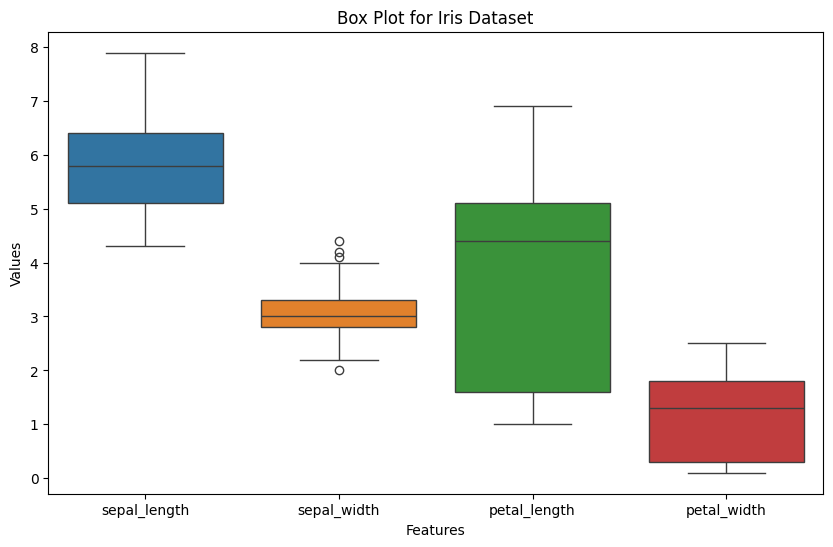

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop('species', axis=1))
plt.title('Box Plot for Iris Dataset')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


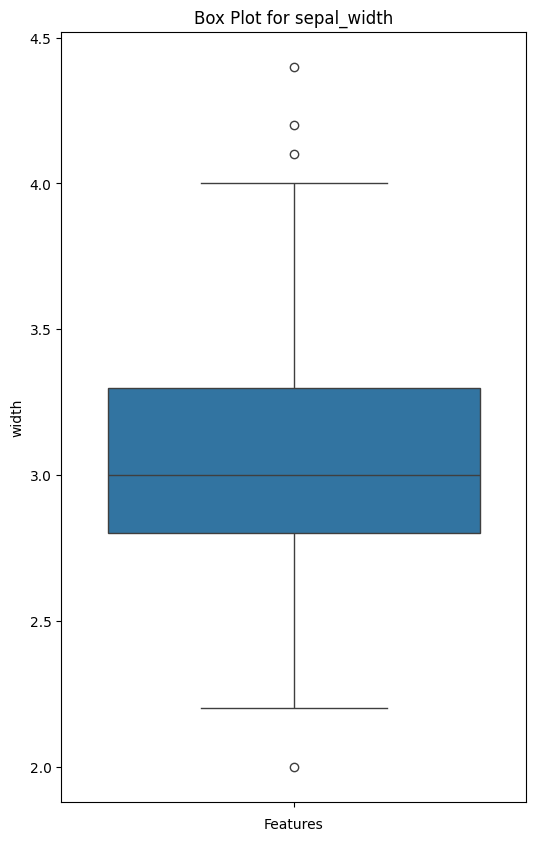

In [ ]:
plt.figure(figsize=(6, 10))
sns.boxplot(data=df['sepal_width'])
plt.title('Box Plot for sepal_width')
plt.xlabel('Features')
plt.ylabel('width')
plt.show()

In [ ]:
skewness = df['sepal_width'].skew()
print(f"Skewness of sepal_width: {skewness}")

Skewness of sepal_width: 0.3243506195620299


### train  test split

In [ ]:
x= df.drop('species',axis=1)
y=df['species']

In [ ]:
## normalization
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(x)

MinMaxScaler()

In [ ]:
x=scalar.transform(x)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVC

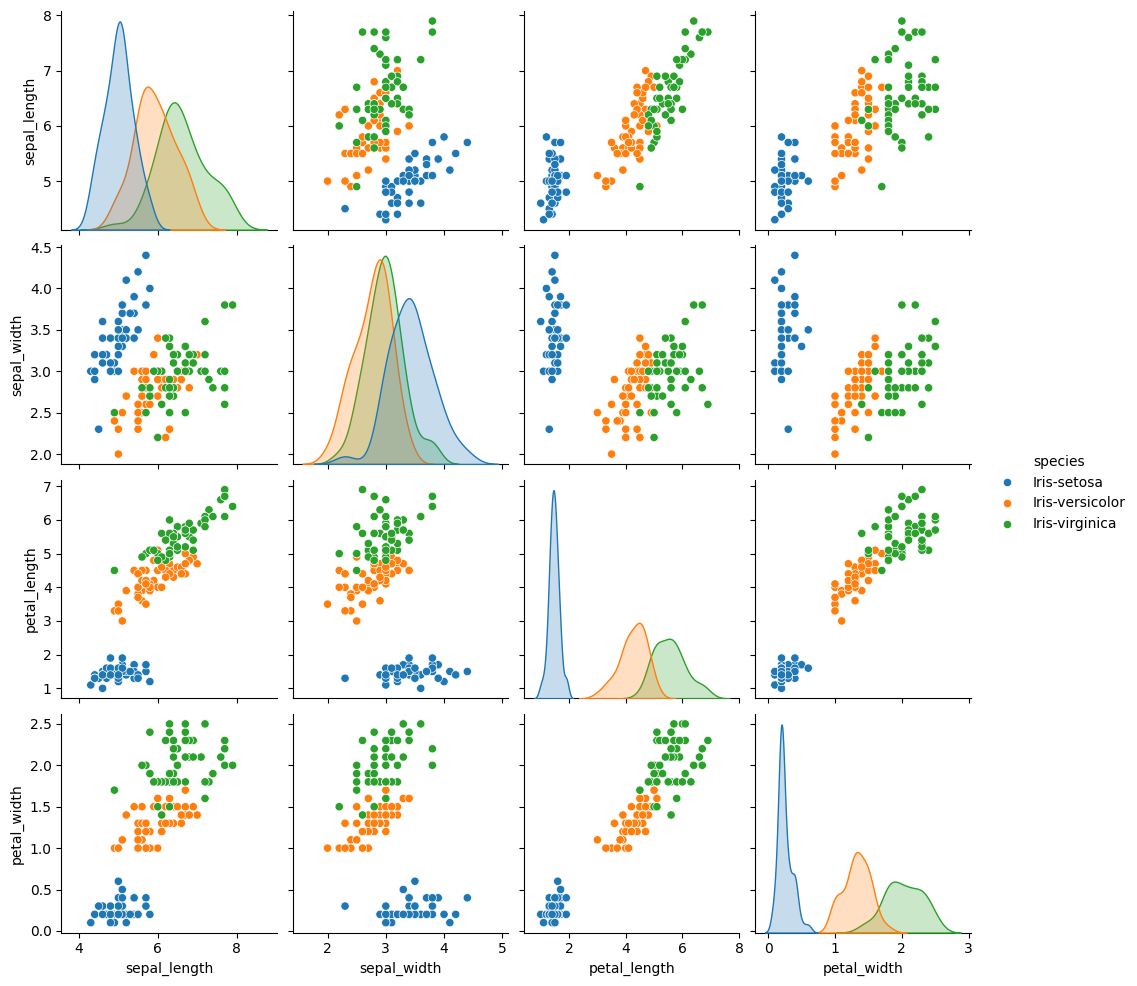

In [ ]:
sns.pairplot(df,hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

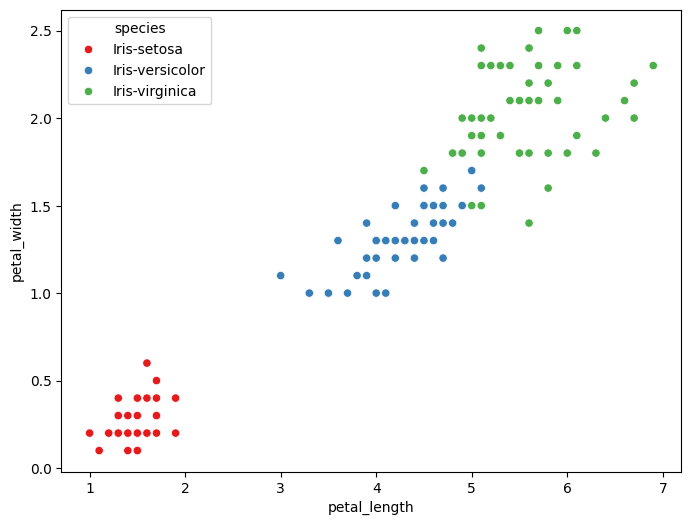

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, palette='Set1')


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

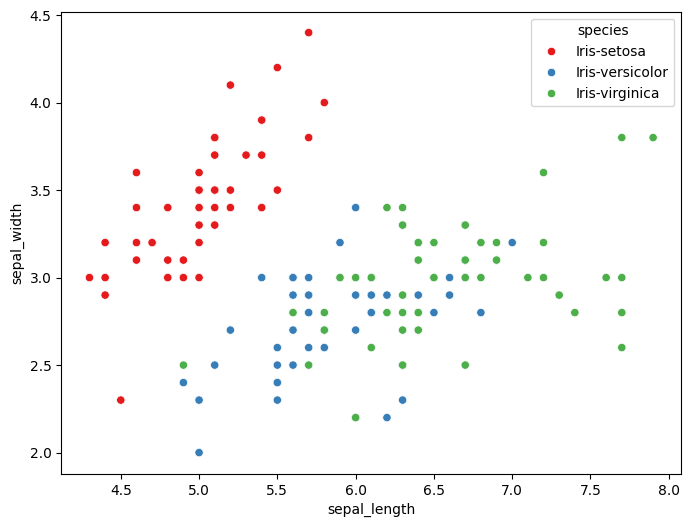

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, palette='Set1')

In [ ]:
model= SVC(kernel='rbf', C=1.0,gamma='scale')
model.fit(X_train,Y_train)

,species
137,Iris-virginica
47,Iris-setosa
121,Iris-virginica
27,Iris-setosa
4,Iris-setosa
...,...
73,Iris-versicolor
108,Iris-virginica
14,Iris-setosa
94,Iris-versicolor


## predict the training data

In [ ]:

y_train_pred=model.predict(X_train)

# test the accuracy of the training data

In [ ]:
train_accuracy=accuracy_score(Y_train,y_train_pred)

In [ ]:
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.9829059829059829


## predict the test data

In [ ]:
Y_test_predict=model.predict(X_test)

## check the accuracy of the test data

In [ ]:
test_accuracy=accuracy_score(Y_test,Y_test_predict)

In [ ]:
test_accuracy

0.9666666666666667

In [ ]:
## lets check the confusion matrix
from sklearn.metrics import confusion_matrix

In [1]:
cm_training=confusion_matrix(Y_train,y_train_pred)

NameError: name 'confusion_matrix' is not defined

In [ ]:
cm_training

array([[37,  0,  0],
       [ 0, 39,  1],
       [ 0,  1, 39]])

<Axes: >

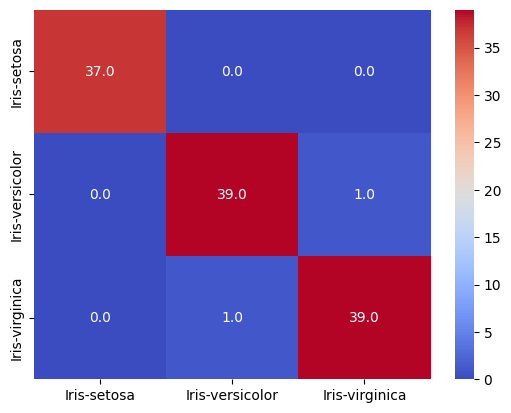

In [ ]:
sns.heatmap(cm_training,annot=True,cmap='coolwarm',fmt='.1f',xticklabels=df['species'].unique(),yticklabels=df['species'].unique())

# **TT,TF,FT,FF,F1 score, precision, accuracy**